<a href="https://colab.research.google.com/github/MarcosArize/Projetos-Ciencia-de-Dados/blob/main/Projeto_Analise_de_mercado_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df_candidatos = pd.read_csv('/content/candidatos_tratados.csv')
df_candidaturas = pd.read_csv('/content/candidaturas_tratadas.csv')
df_entrevistas = pd.read_csv('/content/entrevistas_tratadas.csv')
df_experiencias = pd.read_csv('/content/experiencias_tratadas.csv')

In [3]:
df_candidatos

,id_candidato,nome_completo,email,data_nascimento,genero,cidade_residencia,nivel_formacao,anos_formacao,numero_de_vagas_candidatadas,idade
0,1,Marcos Santos,marcos.santos@email.com,1990-05-12,Masculino,Salvador,Superior Completo,12.0,8,35
1,2,Ana Oliveira,ana.oliveira@email.com,1988-03-21,Feminino,São Paulo,Mestrado,12.0,15,37
2,3,Lucas Ferreira,lucas.ferreira@email.com,1995-07-30,Masculino,Rio de Janeiro,Superior Completo,7.0,5,30
3,4,Carla Souza,carla.souza@email.com,1992-12-05,Feminino,Belo Horizonte,Superior Completo,10.0,9,33
4,5,Paulo Lima,paulo.lima@email.com,1985-08-14,Masculino,Curitiba,Mestrado,15.0,18,40
...,...,...,...,...,...,...,...,...,...,...
245,246,Vinícius Jalles,vinicius.jalles@yahoo.com.br,1979-11-07,Masculino,Guatapará,Mestrado,8.0,10,46
246,247,Wanessa Kramer,wanessa.kramer@gmail.com,1997-09-11,Feminino,Dumont,Superior Completo,5.0,5,28
247,248,Yuri Lins,yuri.lins@example.com,1986-07-16,Masculino,Pradópolis,Técnico,2.0,2,39
248,249,Yasmin Meireles,yasmin.meireles@hotmail.com,1995-05-21,Feminino,Guariba,Ensino Médio,0.0,0,30


In [4]:
df_candidaturas

,id_candidatura,id_candidato,id_vaga,data_candidatura,origem,curriculo_texto,status_cand,experiencia_media_anos,contratado,tempo_candidatura
0,1,1,1,2024-09-10,LinkedIn,Formação em Ciência da Computação; 3 anos em b...,contratado,2.25,1,337
1,2,2,2,2024-11-20,Site,Engenheiro de dados; experiência em ETL e SQL.,recusado,4.46,0,266
2,3,3,3,2024-12-05,Indicação,"Desenvolvedor frontend; React, HTML, CSS.",contratado,3.20,1,251
3,4,4,4,2025-01-15,email,Analista de QA; testes automatizados com Selen...,recusado,3.50,0,210
4,5,5,5,2025-03-10,Facebook,DevOps com experiência em AWS e Docker.,contratado,3.00,1,156
...,...,...,...,...,...,...,...,...,...,...
245,246,246,11,2024-06-07,Site,Mestre de Dados (Data Master) focado em garant...,recusado,10.00,0,432
246,247,247,2,2024-04-17,Indicação,Arquiteto da Informação com experiência em org...,entrevista,5.50,0,483
247,248,248,6,2024-01-31,Catho,Técnico em Geoprocessamento com experiência em...,triagem,2.00,0,560
248,249,249,1,2024-06-25,vagas.com,Em busca de recolocação profissional.,triagem,4.00,0,414


In [5]:
df_entrevistas

,id_entrevista,id_candidatura,entrevistador,data_entrevista,nota,feedback,tempo_entrevista
0,1,1,Ana Silva,2024-09-24,7.96,Ótimo conhecimento em backend; demonstrou arqu...,323
1,2,2,Bruno Costa,2024-11-27,2.66,Conceitos de ETL pouco sólidos; mostrou dificu...,259
2,3,3,Carla Mendes,2024-12-14,8.21,Domínio em frontend e usabilidade; código limp...,242
3,4,4,Diego Rocha,2025-01-28,5.82,Pouca experiência prática em automação; aborda...,197
4,5,5,Eduardo Lima,2025-03-18,7.90,Experiência prática em DevOps e infraestrutura...,148
...,...,...,...,...,...,...,...
245,246,180,Luís Oliveira,2024-02-28,9.00,"Entrevista cultural. Perfil sênior, colaborati...",532
246,247,186,Luís Oliveira,2024-04-02,9.20,Entrevista cultural. Perfil mão na massa e com...,498
247,248,195,Luís Oliveira,2024-06-12,8.50,Entrevista cultural. Boa sinergia com o time c...,427
248,249,202,Luís Oliveira,2024-05-28,8.90,Entrevista cultural. Visão de RH muito alinhad...,442


In [6]:
df_experiencias

,id_experiencia,id_candidato,empresa,cargo,data_inicio,data_fim,anos_experiencia,dias_experiencia
0,1,1,Tech Solutions Ltda,Desenvolvedor Júnior,2019-02-01,2021-05-31,2.250,850
1,2,2,Inova Corp,Analista de Dados,2018-03-15,2022-08-30,4.460,1629
2,3,3,Global Systems,Engenheiro de Software,2020-01-10,2023-03-20,3.200,1165
3,4,4,Smart Solutions,Analista de Suporte,2017-05-20,2020-11-15,3.500,1275
4,5,5,WebTech Digital,Programador Front-End,2019-06-01,2022-05-30,3.000,1094
...,...,...,...,...,...,...,...,...
239,246,155,Escritório de Engenharia,Desenhista Técnico,2021-07-01,2023-06-30,2.000,729
240,247,159,Padaria do Bairro,Atendente,2023-02-01,2024-01-15,0.900,348
241,248,163,Oficina Mecânica,Ajudante Geral,2022-04-01,2024-01-30,1.800,669
242,249,169,Não foi informada a Empresa,Não foi informado o cargo,2019-04-01,2025-08-13,3.515,2326


# EDA - Projeto analise de Mercado

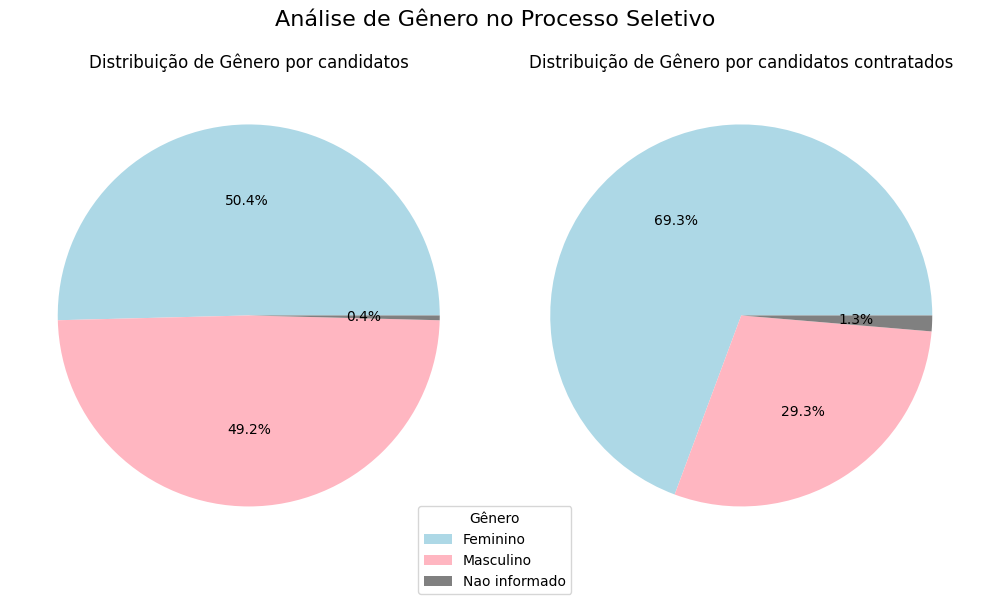

In [7]:
contagem_g = df_candidatos['genero'].value_counts()
df_candidaturas_candidatos = pd.merge(df_candidatos,df_candidaturas,on='id_candidato')
df_contratado = df_candidaturas_candidatos[df_candidaturas_candidatos['contratado']==1]
contagem_g_c = df_contratado['genero'].value_counts()
fig, ax = plt.subplots(figsize=(10,6),nrows=1,ncols=2)
fig.suptitle('Análise de Gênero no Processo Seletivo', fontsize=16)
ax[0].pie(contagem_g.values,colors=['lightblue','lightpink','grey'],autopct='%1.1f%%')
ax[0].set_title('Distribuição de Gênero por candidatos')
ax[1].pie(contagem_g_c.values,colors=['lightblue','lightpink','grey'],autopct='%1.1f%%')
ax[1].set_title('Distribuição de Gênero por candidatos contratados')
fig.legend(contagem_g_c.index,title='Gênero',loc='lower center')
plt.tight_layout()
plt.show()

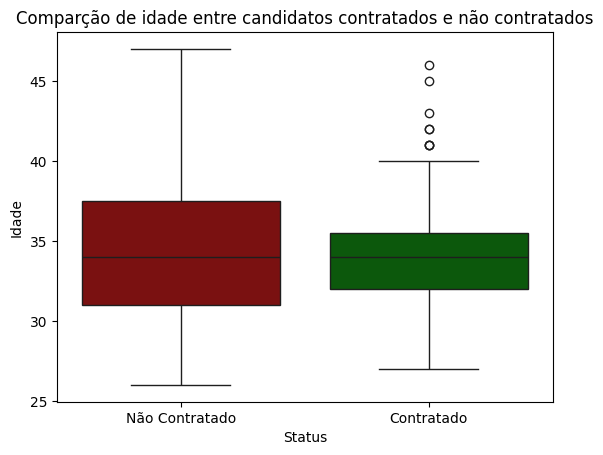

In [8]:
sns.boxplot(x='contratado',y='idade',data=df_candidaturas_candidatos,palette={1: 'darkgreen', 0: 'darkred'}, hue='contratado',legend=False)
plt.title('Comparção de idade entre candidatos contratados e não contratados')
plt.ylabel('Idade')
plt.xlabel('Status')
plt.xticks(ticks=[0,1],labels=['Não Contratado','Contratado'])
plt.show()

H0: Não existe associação entre o nível de formação e a contratação. As variáveis são independentes.

---

H1: Existe uma associação entre o nível de formação e a contratação.

In [9]:
tabela_contingencia = pd.crosstab(df_candidaturas_candidatos['nivel_formacao'], df_candidaturas_candidatos['contratado'])
chi2, p_value, dof, expected = chi2_contingency(tabela_contingencia)

print(f"\nEstatística Qui-Quadrado: {chi2:.4f}")
print(f"Valor-p (p-value): {p_value:.4f}")
if p_value < 0.05:
    print("\nConclusão: Resultado significativo (p < 0.05).")
    print("Rejeitamos a hipótese nula. Existe uma associação estatística entre o nível de formação e a contratação.")
else:
    print("\nConclusão: Resultado não significativo (p >= 0.05).")
    print("Não há evidências para dizer que o nível de formação impacta a contratação.")


Estatística Qui-Quadrado: 29.9290
Valor-p (p-value): 0.0001

Conclusão: Resultado significativo (p < 0.05).
Rejeitamos a hipótese nula. Existe uma associação estatística entre o nível de formação e a contratação.


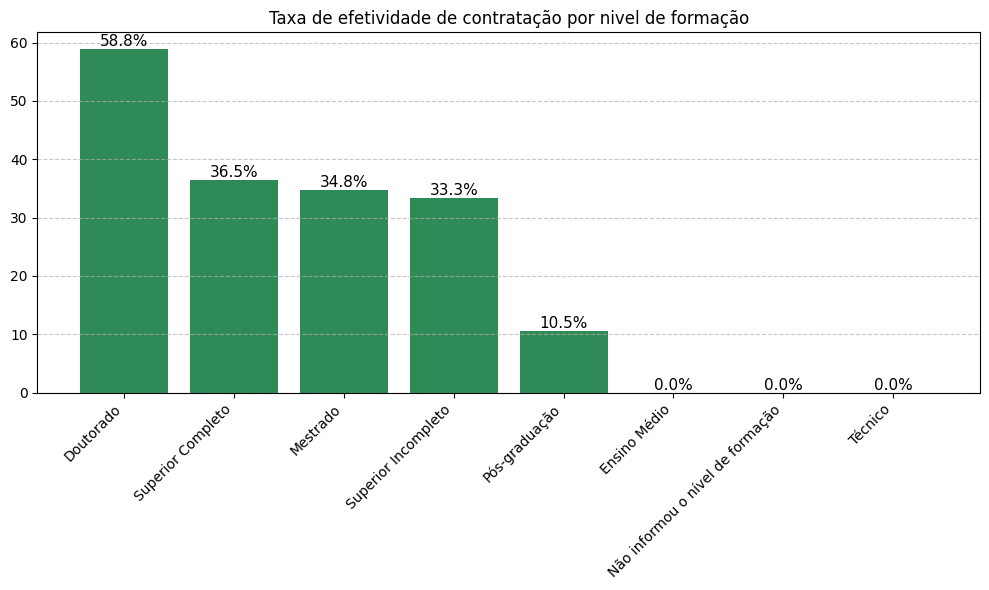

In [10]:
taxa_contracao_nf = df_candidaturas_candidatos.groupby('nivel_formacao')['contratado'].mean()
pct_contratacao_nf = (taxa_contracao_nf*100).sort_values(ascending=False)
fig,ax = plt.subplots(figsize=(10,6))
barras = ax.bar(pct_contratacao_nf.index,pct_contratacao_nf.values,color='seagreen')
ax.set_title('Taxa de efetividade de contratação por nivel de formação')
ax.bar_label(barras, fmt='%.1f%%', fontsize=11)
ax.grid(axis='y',linestyle='--',alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

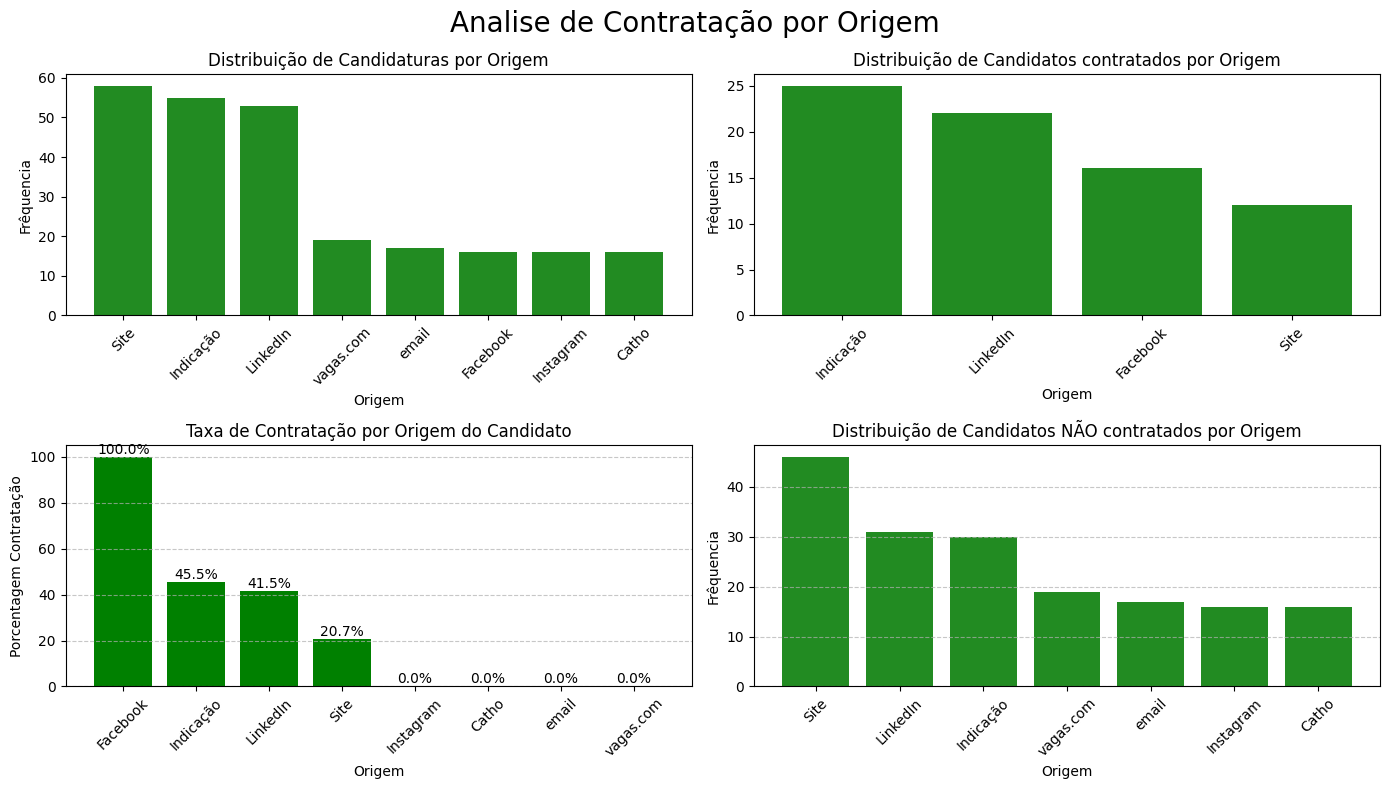

In [11]:
contagem = df_candidaturas['origem'].value_counts()
taxa_contratacao_o = df_candidaturas_candidatos.groupby('origem')['contratado'].mean()
pct_contratacao_o = (taxa_contratacao_o*100).sort_values(ascending=False)
df_origem_contratado = df_candidaturas[df_candidaturas['contratado']==1]
df_n_contratados = df_candidaturas_candidatos[df_candidaturas_candidatos['contratado']==0]
contagem_n_nf = df_n_contratados['origem'].value_counts()
contagem_c = df_origem_contratado['origem'].value_counts()
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (14,8))
ax[0,0].bar(contagem.index,contagem.values,color = 'forestgreen')
ax[0,0].set_title('Distribuição de Candidaturas por Origem')
ax[0,0].set_xlabel('Origem')
ax[0,0].set_ylabel('Frêquencia')
ax[0,0].tick_params(axis='x',rotation = 45)
ax[0,1].bar(contagem_c.index,contagem_c.values,color='forestgreen')
ax[0,1].set_title('Distribuição de Candidatos contratados por Origem')
ax[0,1].set_xlabel('Origem')
ax[0,1].set_ylabel('Frêquencia')
ax[0,1].tick_params(axis='x',rotation = 45)
barras = ax[1,0].bar(pct_contratacao_o.index,pct_contratacao_o.values,color = 'g')
ax[1,0].set_title('Taxa de Contratação por Origem do Candidato')
ax[1,0].bar_label(barras,fmt='%.1f%%')
ax[1,0].grid(axis='y',linestyle='--',alpha=0.7)
ax[1,0].set_xlabel('Origem')
ax[1,0].set_ylabel('Porcentagem Contratação')
ax[1,0].tick_params(rotation=45,axis='x')
ax[1,1].bar(contagem_n_nf.index,contagem_n_nf.values,color='forestgreen')
ax[1,1].set_title('Distribuição de Candidatos NÃO contratados por Origem')
ax[1,1].set_xlabel('Origem')
ax[1,1].set_ylabel('Frêquencia')
ax[1,1].grid(axis='y',linestyle='--',alpha=0.7)
ax[1,1].tick_params(rotation = 45,axis= 'x')
fig.suptitle('Analise de Contratação por Origem',fontsize=20)
plt.tight_layout()
plt.show()

In [12]:
df_entrevistas_candidaturas = pd.merge(df_entrevistas,df_candidaturas,on='id_candidatura')

total_candidaturas = df_candidaturas_candidatos.groupby('origem')['id_candidatura'].count()

pct_total = (total_candidaturas/len(df_candidaturas_candidatos))*100

ap_triagem = df_candidaturas_candidatos[df_candidaturas_candidatos['status_cand'].isin(['triagem','entrevista','contratado'])]

pct_triagem = ((ap_triagem.groupby('origem')['id_candidatura'].count()/total_candidaturas)*100).round()

ap_entrevista = df_candidaturas_candidatos[df_candidaturas_candidatos['status_cand'].isin(['entrevista','contratado'])]

pct_entrevista = ((ap_entrevista.groupby('origem')['id_candidatura'].count()/total_candidaturas)*100).round()

pct_contratado = df_candidaturas_candidatos.groupby('origem')['contratado'].mean()*100

media_nota = df_entrevistas_candidaturas.groupby('origem')['nota'].mean()

media_anos  = df_candidaturas_candidatos.groupby('origem')['experiencia_media_anos'].mean()

lista_metricas = [
    total_candidaturas,
    pct_total,
    pct_triagem,
    pct_entrevista,
    pct_contratado,
    media_nota,
    media_anos
]
matriz_final = pd.concat(lista_metricas, axis=1)

matriz_final.columns = [
    'Total de Candidaturas', '% do Total', 'Taxa de Aprovação na Triagem (%)',
    'Taxa de Conversão para Entrevista (%)', 'Taxa de Contratação (%)',
    'Nota Média na Entrevista', 'Anos de Experiência Média'
]

matriz_final = matriz_final.sort_values(by='Total de Candidaturas', ascending = False)
matriz_final = matriz_final.fillna(0)
matriz_final = matriz_final.style.format({
    'Total de Candidaturas': '{:.0f}',
    '% do Total': '{:.0f}%',
    'Taxa de Aprovação na Triagem (%)': '{:.1f}%',
    'Taxa de Conversão para Entrevista (%)': '{:.1f}%',
    'Taxa de Contratação (%)': '{:.1f}%',
    'Nota Média na Entrevista': '{:.2f}',
    'Anos de Experiência Média': '{:.1f}'
}).background_gradient(cmap='Greens', subset=['Taxa de Contratação (%)'])
display(matriz_final)

,Total de Candidaturas,% do Total,Taxa de Aprovação na Triagem (%),Taxa de Conversão para Entrevista (%),Taxa de Contratação (%),Nota Média na Entrevista,Anos de Experiência Média
origem,,,,,,,
Site,58,23%,57.0%,48.0%,20.7%,7.27,6.3
Indicação,55,22%,95.0%,91.0%,45.5%,8.52,6.8
LinkedIn,53,21%,89.0%,85.0%,41.5%,8.00,4.7
vagas.com,19,8%,74.0%,0.0%,0.0%,0.00,1.3
email,17,7%,0.0%,0.0%,0.0%,3.63,3.6
Instagram,16,6%,0.0%,0.0%,0.0%,3.80,4.1
Catho,16,6%,81.0%,6.0%,0.0%,8.10,2.5
Facebook,16,6%,100.0%,100.0%,100.0%,8.20,3.6


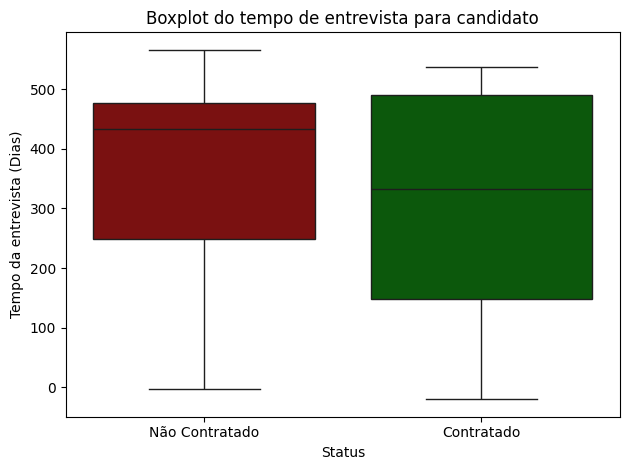

In [13]:

sns.boxplot(x='contratado',y='tempo_entrevista',data=df_entrevistas_candidaturas,palette= {1:'darkgreen',0:'darkred'},hue = 'contratado',legend= False )
plt.title('Boxplot do tempo de entrevista para candidato')
plt.xticks(ticks=[0,1],labels=['Não Contratado','Contratado'])
plt.xlabel('Status')
plt.ylabel('Tempo da entrevista (Dias)')
plt.tight_layout()
plt.show()

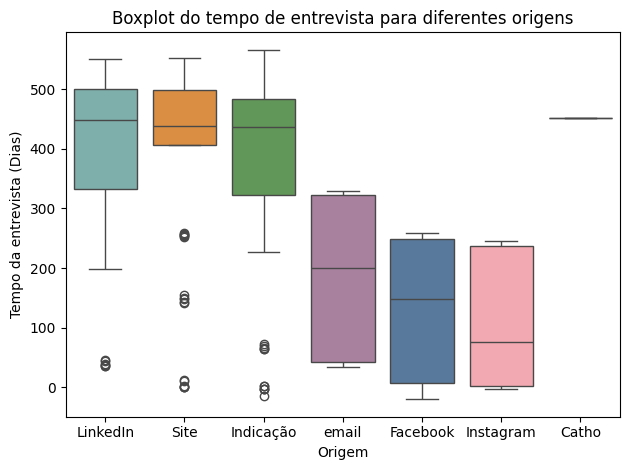

In [14]:
sns.boxplot(x='origem',y='tempo_entrevista',data=df_entrevistas_candidaturas,hue='origem',legend=False,
            palette={'LinkedIn': '#76b7b2',   # Azul suave
    'Site': '#f28e2b',     # Laranja suave
    'Indicação': '#59a14f',  # Verde suave
    'email': '#af7aa1',     # Roxo suave
    'Facebook': '#4e79a7',   # Azul-piscina
    'Instagram': '#ff9da7',  # Rosa suave
    'Catho': '#9c755f'      # Marrom claro
}
            )
plt.title('Boxplot do tempo de entrevista para diferentes origens')
plt.xlabel('Origem')
plt.ylabel('Tempo da entrevista (Dias)')
plt.tight_layout()
plt.show()

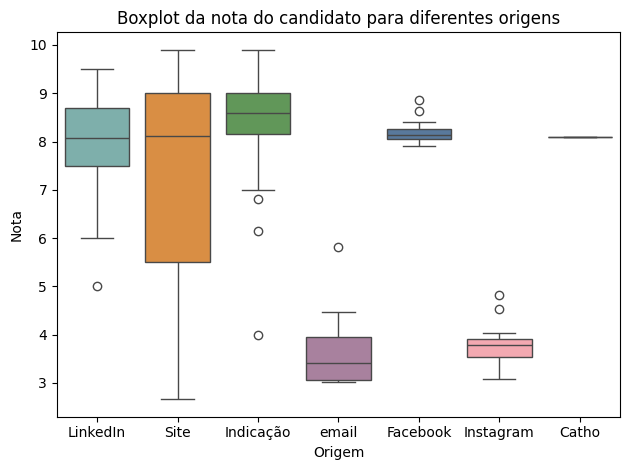

In [15]:
sns.boxplot(x='origem',y='nota',data=df_entrevistas_candidaturas,hue='origem',legend=False,
            palette={
    'LinkedIn': '#76b7b2',   # Azul suave
    'Site': '#f28e2b',     # Laranja suave
    'Indicação': '#59a14f',  # Verde suave
    'email': '#af7aa1',     # Roxo suave
    'Facebook': '#4e79a7',   # Azul-piscina
    'Instagram': '#ff9da7',  # Rosa suave
    'Catho': '#9c755f'      # Marrom claro
}
            )
plt.title('Boxplot da nota do candidato para diferentes origens')
plt.xlabel('Origem')
plt.ylabel('Nota')
plt.tight_layout()
plt.show()

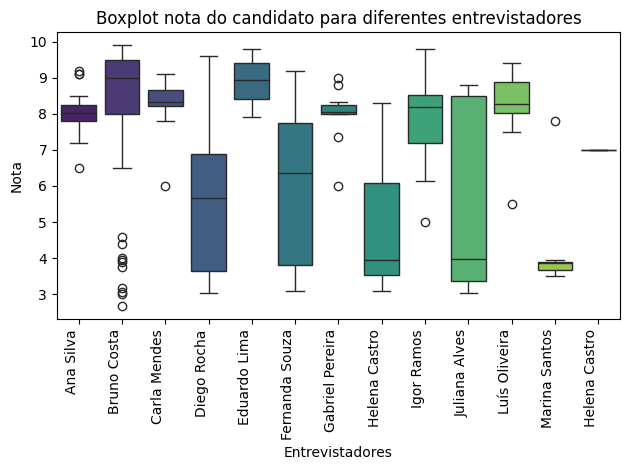

In [16]:
medianas = df_entrevistas_candidaturas.groupby('entrevistador')['nota'].median()
paleta_sequencial = sns.color_palette("viridis", n_colors=len(medianas))
sns.boxplot(x='entrevistador',y='nota',data=df_entrevistas_candidaturas,hue='entrevistador',legend=False,palette=paleta_sequencial)
plt.title('Boxplot nota do candidato para diferentes entrevistadores')
plt.xlabel('Entrevistadores')
plt.ylabel('Nota')

plt.xticks(rotation=90,ha='right')
plt.tight_layout()
plt.show()

In [17]:
total_entrevistador = df_entrevistas_candidaturas.groupby('entrevistador')['id_candidatura'].count()
pct_entrevistador = (total_entrevistador/len(df_entrevistas_candidaturas))*100
nota_entrevistador = df_entrevistas_candidaturas.groupby('entrevistador')['nota'].mean()
std_nota = df_entrevistas_candidaturas.groupby('entrevistador')['nota'].std()
pct_contratacao = (df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==1].groupby('entrevistador')['id_candidatura'].count()/total_entrevistador)*100

lista_matriz = [
    total_entrevistador,
    pct_entrevistador,
    nota_entrevistador,
    std_nota,
    pct_contratacao
]

matriz = pd.concat(lista_matriz,axis=1)
matriz.columns = [
    'Total do Entrevistador', '% do Total', 'Média da Nota', 'Desvio padrão da nota', 'Taxa de contratação (%)'
]
matriz = matriz.fillna(0)
matriz = matriz.sort_values(by = 'Total do Entrevistador',ascending = False)
matriz = matriz.style.format(
    {
        'Total do Entrevistador' : '{:.0f}',
        '% do Total' : '{:.1f}%',
        'Média da Nota' : '{:.1f}',
        'Desvio padrão da nota' : '{:.1f}',
        'Taxa de contratação (%)' : '{:.1f}%'
    }
).background_gradient(cmap='Greens', subset=['Taxa de contratação (%)'])
display(matriz)

,Total do Entrevistador,% do Total,Média da Nota,Desvio padrão da nota,Taxa de contratação (%)
entrevistador,,,,,
Bruno Costa,49,19.6%,7.9,2.3,44.9%
Luís Oliveira,26,10.4%,8.4,0.8,46.2%
Eduardo Lima,26,10.4%,8.9,0.6,76.9%
Ana Silva,22,8.8%,8.0,0.6,50.0%
Igor Ramos,21,8.4%,7.9,1.1,42.9%
Carla Mendes,19,7.6%,8.3,0.7,68.4%
Diego Rocha,18,7.2%,5.5,2.1,5.6%
Fernanda Souza,18,7.2%,5.9,2.0,5.6%
Juliana Alves,15,6.0%,5.7,2.5,0.0%


H0 : A correlação entre a nota dos candidatos e o tempo de entrevista não é estatisticamente significativa

---

H1 : A correlação entre a nota e o tempo de entrevista dos candidatos é estatisticamente significativa

In [18]:
r,p_val = stats.pearsonr(df_entrevistas_candidaturas['nota'],df_entrevistas_candidaturas['tempo_entrevista'])
print(f" Coeficiente de Pearson (r):{r:.4f}")
print(f"p-val: {p_val:.4f}")

if p_val <0.05:
  print("\nConclusão: (p-val < 0.05) ")
  print("\nRejeitamos a Hípotese nula. Tendo que a correlação entre a nota dos candidatos e o tempo de entrevista é estatisticamente significativo")
else:
  print("\nConclusão: (p-val >= 0.05)")
  print("\nNão possuimos evidencias suficientes para provar que existe uma correlação entre a nota e o tempo de entrevista dos candidatos")

 Coeficiente de Pearson (r):0.4968
p-val: 0.0000

Conclusão: (p-val < 0.05) 

Rejeitamos a Hípotese nula. Tendo que a correlação entre a nota dos candidatos e o tempo de entrevista é estatisticamente significativo


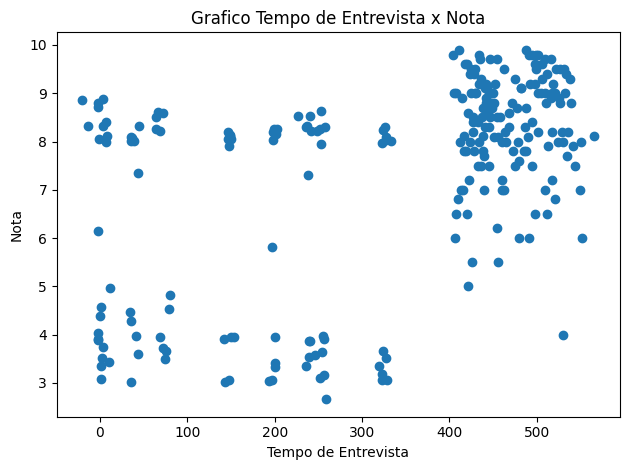

In [19]:
fig, ax = plt.subplots()
ax.scatter(data=df_entrevistas_candidaturas,x='tempo_entrevista',y='nota')
ax.set_xlabel('Tempo de Entrevista')
ax.set_ylabel('Nota')
ax.set_title('Grafico Tempo de Entrevista x Nota')
plt.tight_layout()
plt.show()

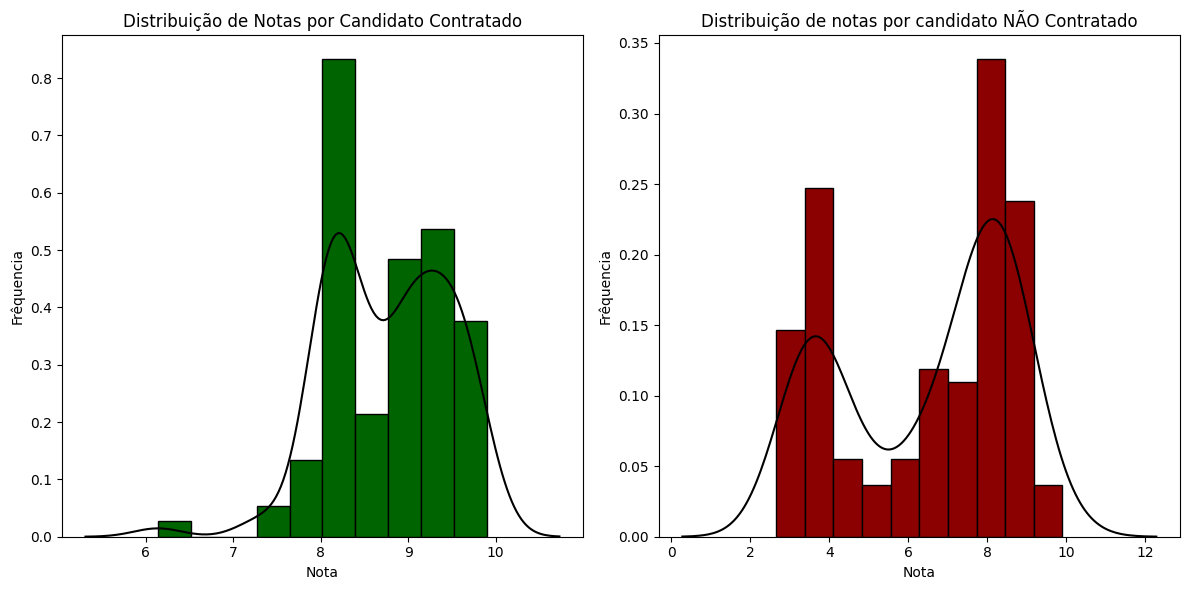

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
ax[0].hist(x='nota',data=df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==1],color = 'darkgreen',edgecolor='black',density=True)
sns.kdeplot(df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==1],x='nota',ax=ax[0],color = 'black')
ax[0].set_title('Distribuição de Notas por Candidato Contratado')
ax[0].set_xlabel('Nota')
ax[0].set_ylabel('Frêquencia')
ax[1].hist(x='nota',data=df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==0],color='darkred',edgecolor='black',density=True)
ax[1].set_title('Distribuição de notas por candidato NÃO Contratado')
ax[1].set_xlabel('Nota')
ax[1].set_ylabel('Frêquencia')
sns.kdeplot(df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==0],x='nota',ax=ax[1],color = 'black')
plt.tight_layout()
plt.show()

H0 : As variancias de nota para candidatos contratados e não contratados são iguais

---

H1: As variancias de nota para candidatos contratados e não contratados não são iguais

In [23]:
statisct,p_val = stats.bartlett(df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==1]['nota'],df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==0]['nota'])

In [24]:
print(f"Estatística do teste: {statisct:.4f}")
print(f"Valor-p (p-value): {p_val:.4f}")

Estatística do teste: 113.9406
Valor-p (p-value): 0.0000


Temos um p-value menor que 0.05, logo rejeitamos a hipotese nula e assumimos que a variancia para candidatos contratados e não contratados não são iguais

H0: A média das notas de candidatos contratados e não contratados não são significativamente diferentes

---

H1 : A média das notas de candidatos contratados e não contratados são significativamente diferentes

In [25]:
statisc,p_value = stats.ttest_ind(a= df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==1]['nota'],b= df_entrevistas_candidaturas[df_entrevistas_candidaturas['contratado']==0]['nota'],equal_var=False)
print(f"Estatitica do test: {statisc:.4f}")
print(f"p-val: {p_value:.4f}")

Estatitica do test: 12.0712
p-val: 0.0000


temos um p-value menor que 0.05, rejeitando a hipotese nula assumimos que a media da nota dos candidatos contratados e não contratados é significativamente diferente, como podemos observar no histograma com a media dos candidatos contratados sendo maior

In [28]:
import nltk

# Este comando vai baixar a lista de stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df_merged = pd.merge(df_entrevistas, df_candidaturas, on='id_candidatura', how='left')
df_analise = df_merged[['feedback', 'contratado']].copy()
df_analise.dropna(subset=['feedback'], inplace=True)

feedback_contratados = df_analise[df_analise['contratado'] == 1]['feedback'].astype(str).tolist()
feedback_nao_contratados = df_analise[df_analise['contratado'] == 0]['feedback'].astype(str).tolist()


stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stopwords_pt.extend(['candidato', 'candidata', 'entrevista', 'empresa', 'projeto', 'projetos', 'vaga', 'processo', 'equipe', 'demonstrou', 'mostrou', 'ser'])

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.lower().split()
    tokens = [word for word in tokens if word not in stopwords_pt and len(word) > 2]
    return " ".join(tokens)

textos_contratados_limpos = [preprocess_text(fb) for fb in feedback_contratados]
textos_nao_contratados_limpos = [preprocess_text(fb) for fb in feedback_nao_contratados]

def run_lda(corpus, title, n_topics=3, n_top_words=5):
    try:
        vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words=stopwords_pt)
        X = vectorizer.fit_transform(corpus)
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)

        print(f"\n--- {title} ---")

        feature_names = vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(lda.components_):
            top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            print(f"Tópico {topic_idx + 1}: {' | '.join(top_words)}")
        print("-" * 50)
    except Exception as e:
        print(f"Ocorreu um erro durante a análise de '{title}': {e}")


# Executar a análise para os dois grupos
run_lda(textos_contratados_limpos, "Tópicos de Sucesso (Candidatos Contratados)")
run_lda(textos_nao_contratados_limpos, "Tópicos de Rejeição (Candidatos Não Contratados)")


--- Tópicos de Sucesso (Candidatos Contratados) ---
Tópico 1: entrega | boa | postura | estágio | frontend
Tópico 2: time | contratar | excelente | ótima | aprovado
Tópico 3: experiência | prática | backend | devops | infraestrutura
--------------------------------------------------

--- Tópicos de Rejeição (Candidatos Não Contratados) ---
Tópico 1: bom | conhecimento | boa | experiência | técnico
Tópico 2: portfólio | limitado | justificar | design | escolhas
Tópico 3: experiência | pouca | comunicação | planejamento | times
--------------------------------------------------
